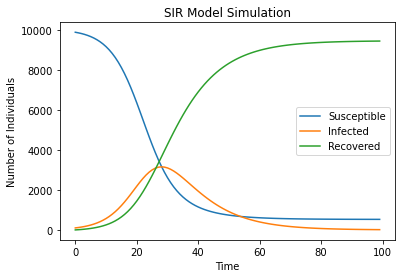

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_sir_model(beta, gamma, population, initial_infected, num_days):
    """
    Simulates the SIR model with the given parameters and initial conditions.
    Returns three arrays: time, susceptible, infected, recovered.
    """
    susceptible = np.zeros(num_days)
    infected = np.zeros(num_days)
    recovered = np.zeros(num_days)
    
    susceptible[0] = population - initial_infected
    infected[0] = initial_infected
    
    for day in range(1, num_days):
        new_infections = beta * susceptible[day-1] * infected[day-1] / population
        new_recoveries = gamma * infected[day-1]
        
        susceptible[day] = susceptible[day-1] - new_infections
        infected[day] = infected[day-1] + new_infections - new_recoveries
        recovered[day] = recovered[day-1] + new_recoveries
    
    return susceptible, infected, recovered

# Example usage:
beta = 0.3  # Infection rate
gamma = 0.1  # Recovery rate
population = 10000  # Total population size
initial_infected = 100  # Initial number of infected individuals
num_days = 100  # Number of days to simulate

susceptible, infected, recovered = simulate_sir_model(beta, gamma, population, initial_infected, num_days)

# Plotting the results
time = np.arange(num_days)
plt.plot(time, susceptible, label='Susceptible')
plt.plot(time, infected, label='Infected')
plt.plot(time, recovered, label='Recovered')
plt.xlabel('Time')
plt.ylabel('Number of Individuals')
plt.title('SIR Model Simulation')
plt.legend()
plt.show()